In [1]:
from google.colab import drive
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
import matplotlib.pyplot as plt

In [2]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


(256, 256)


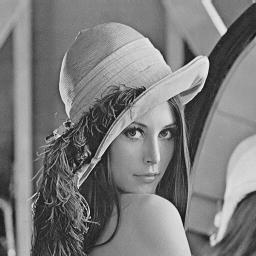

In [19]:
img = cv2.imread('/content/gdrive/My Drive/colabIP/Images/lena256.jpg')
RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

gimg1 = cv2.cvtColor(RGB_img, cv2.COLOR_RGB2GRAY)
print(gimg1.shape)
#plt.imshow(gimg1, cmap='gray')
cv2_imshow(gimg1)

In [16]:
gOutimg = np.zeros((gimg1.shape[0], gimg1.shape[1]))

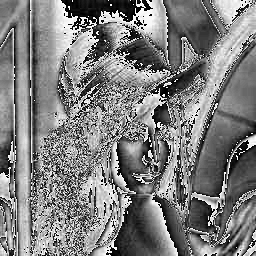

In [21]:
for h in range(0, gimg1.shape[0]):
  for w in range(0, gimg1.shape[1]):
    val = gimg1[h,w] % 64
    val = val * 4
    gOutimg[h,w] = val

#plt.imshow(gOutimg, cmap='gray')
cv2_imshow(gOutimg)

In [25]:
equalval = 200
width = 5

min = equalval - width
max = equalval + width

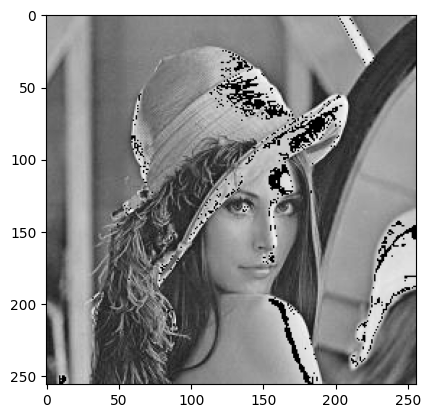

In [26]:
for h in range(0, gimg1.shape[0]):
  for w in range(0, gimg1.shape[1]):
    if(gimg1[h,w] > min and gimg1[h,w] < max):
      gOutimg[h,w] = 0
    else:
      gOutimg[h,w] = gimg1[h,w]

plt.imshow(gOutimg, cmap = 'gray')

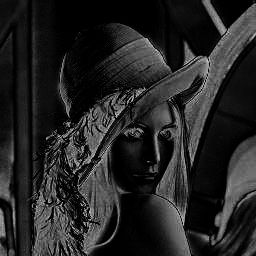

In [27]:
for h in range(0, gimg1.shape[0]):
  for w in range(0, gimg1.shape[1]):
    val = 255*(gimg1[h,w]/128-1)*(gimg1[h,w]/128-1)
    gOutimg[h,w] = val

cv2_imshow(gOutimg)

In [47]:
planeNumber = 1
planeValue = 1

for i in range(planeNumber-1):
  planeValue = planeValue * 2

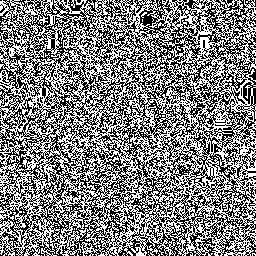

In [69]:
for h in range(0, gimg1.shape[0]):
  for w in range(0, gimg1.shape[1]):
    imVal = (int)(gimg1[h,w] / planeValue)
    if(imVal % 2 == 0):
      gOutimg[h,w] = 0
    else:
      gOutimg[h,w] = 255

cv2_imshow(gOutimg)

(286, 322)


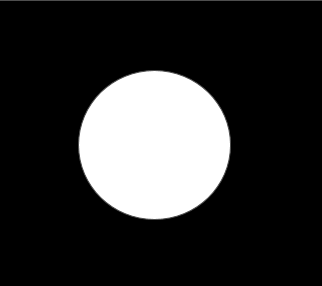

In [70]:
img = cv2.imread('/content/gdrive/My Drive/colabIP/Images/circle.bmp')
RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

gimg2 = cv2.cvtColor(RGB_img, cv2.COLOR_RGB2GRAY)
print(gimg2.shape)
cv2_imshow(gimg2)

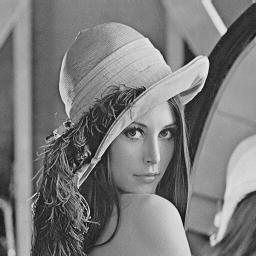

In [71]:
gWaterMarker = gimg1.copy()

for h in range(0, gimg1.shape[0]):
  for w in range(0, gimg1.shape[1]):
    imVal = gimg2[h,w]
    if(imVal > 128):
      if(gimg1[h,w] % 2 == 0):
        gWaterMarker[h,w] += 1
      else:
        if(gimg1[h,w]% 2 == 1):
          gWaterMarker[h,w] -= 1

cv2_imshow(gWaterMarker)

In [72]:
planeNumber = 1
planeValue = 1

for i in range(planeNumber-1):
  planeValue = planeValue * 2

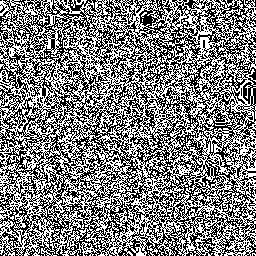

In [75]:
for h in range(0, gimg1.shape[0]):
  for w in range(0, gimg1.shape[1]):
    imVal = (int)(gWaterMarker[h,w] / planeValue)
    if(imVal % 2 == 0):
      gOutimg[h,w] = 0
    else:
      gOutimg[h,w] = 255

cv2_imshow(gOutimg)